In [1]:
import pandas as pd
import os
from glob import glob

pd.set_option('future.no_silent_downcasting', True)

Definição das variáveis

In [2]:
anos: list[str] = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014"]
colunas_a_manter: list[str] = ['Unidade da Federação', 'Menor de 10 anos', '10 a 14 anos', '15 a 19 anos', 'Total']
linhas_a_manter: list[int] = [3, 8, 19, 23, 24, 29]
dfs: list[pd.DataFrame] = []
axs = []
current_dir: str = os.getcwd()
idh_dir: str = os.path.join(current_dir, 'IDHs')
csv_files: list[str] = glob(os.path.join(idh_dir, '*.csv')) 

Adiciona e mostra cada csv já organizado da pasta IDHs

In [8]:

for i, file in enumerate(csv_files):
    head: pd.DataFrame = pd.read_csv(file, skiprows=3, nrows=1, encoding='cp1252', sep=';')
    head = head.columns.to_list()
    colunas_desejadas: list[str] = [col for col in colunas_a_manter if col in head]
    df: pd.DataFrame = pd.read_csv(file, skiprows = lambda x: x not in linhas_a_manter, encoding='cp1252', sep=';', usecols=colunas_desejadas)
    if "Menor de 10 anos" not in df.columns:
        df.insert(1, "Menor de 10 anos", 0)
    df.replace("-", 0, inplace=True)
    df['Unidade da Federação'] = df['Unidade da Federação'].apply(lambda x: x[3:])
    df.set_index('Unidade da Federação', inplace=True)
    colunas_numericas = ['Menor de 10 anos', '10 a 14 anos', '15 a 19 anos', 'Total']
    df[colunas_a_manter[1:]] = df[colunas_a_manter[1:]].apply(pd.to_numeric)
    dfs.append(df)
    print(anos[i])
    display(df)


2021


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,1,1783,28177,137129
Bahia,1,1564,27071,185459
São Paulo,0,1661,47430,525239
Paraná,0,604,15186,141976
Goiás,0,452,11376,90961


2020


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,1670,27588,132938
Bahia,0,1568,28777,188960
São Paulo,0,1772,52478,552310
Paraná,0,629,15958,146291
Goiás,0,474,11730,92768


2019


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,2,1816,29504,138341
Bahia,0,1808,31845,197249
São Paulo,0,1961,58837,583191
Paraná,0,714,18167,153469
Goiás,0,530,12800,96112


2018


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,1887,31438,141819
Bahia,0,2014,34723,205332
São Paulo,0,2289,65585,606146
Paraná,0,751,19869,156201
Goiás,0,583,13697,98872


2017


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,1867,31949,138684
Bahia,0,2155,36712,204096
São Paulo,0,2432,71626,611803
Paraná,0,877,21444,157701
Goiás,0,597,14413,97520


2016


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,2178,33254,137681
Bahia,0,2192,37663,199830
São Paulo,1,2690,76607,601437
Paraná,0,943,23063,155066
Goiás,0,738,15751,95563


2015


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,2262,35857,143657
Bahia,0,2363,39140,206655
São Paulo,0,3187,84463,634026
Paraná,0,1169,25938,160947
Goiás,0,774,17007,100672


2014


,Menor de 10 anos,10 a 14 anos,15 a 19 anos,Total
Unidade da Federação,,,,
Pará,0,2315,36823,143503
Bahia,0,2423,39715,204034
São Paulo,0,3604,87481,625687
Paraná,0,1327,27316,159915
Goiás,0,866,17640,99798


Adiciona e mostra os gráficos com os dados transformados em porcentagem dos DataFrames dos csv's da pasta IDHs

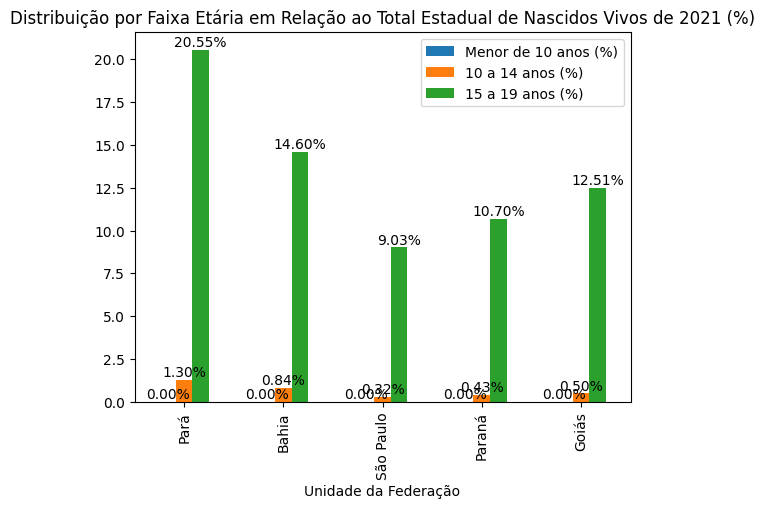

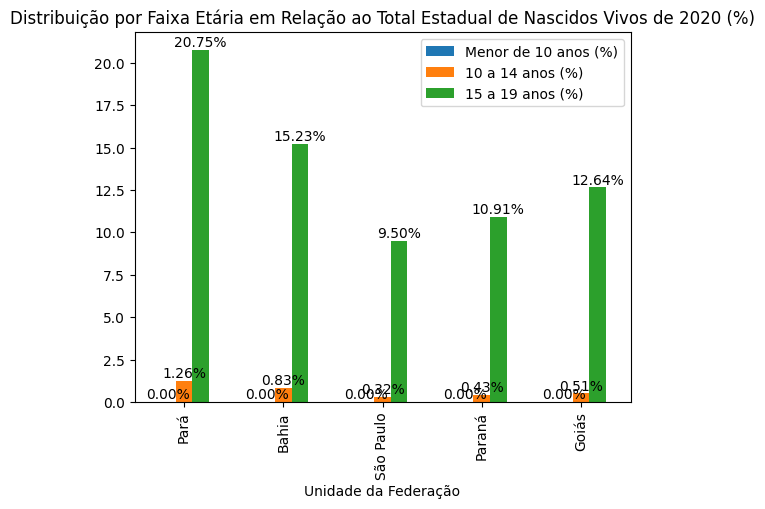

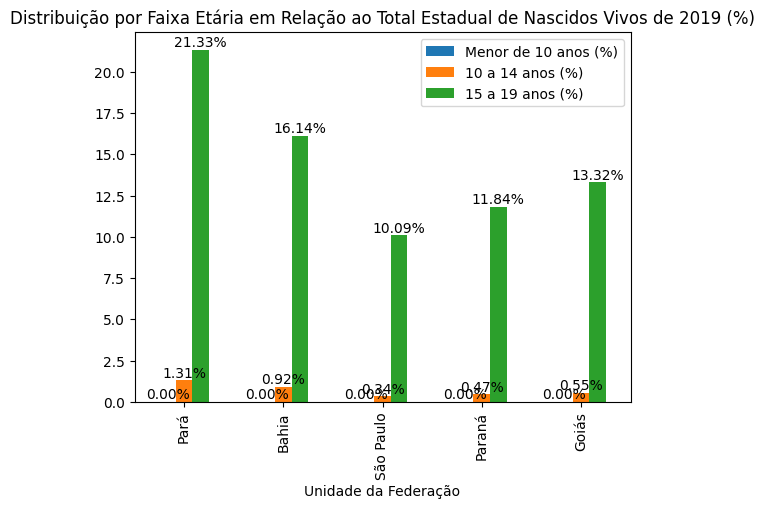

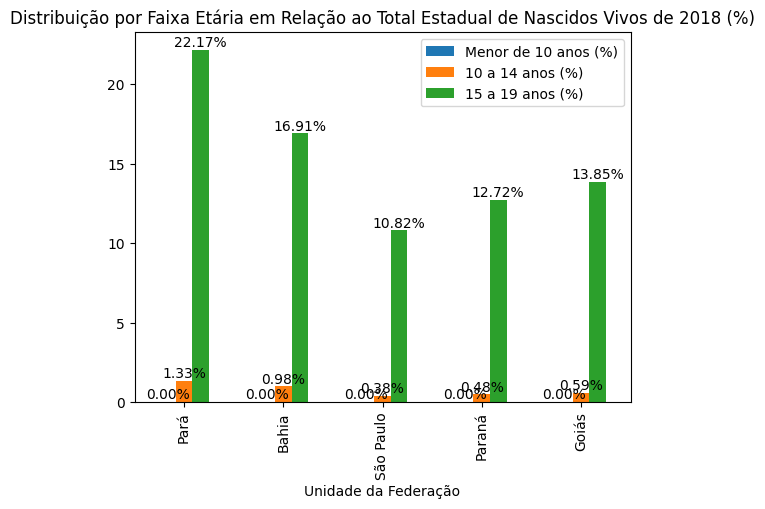

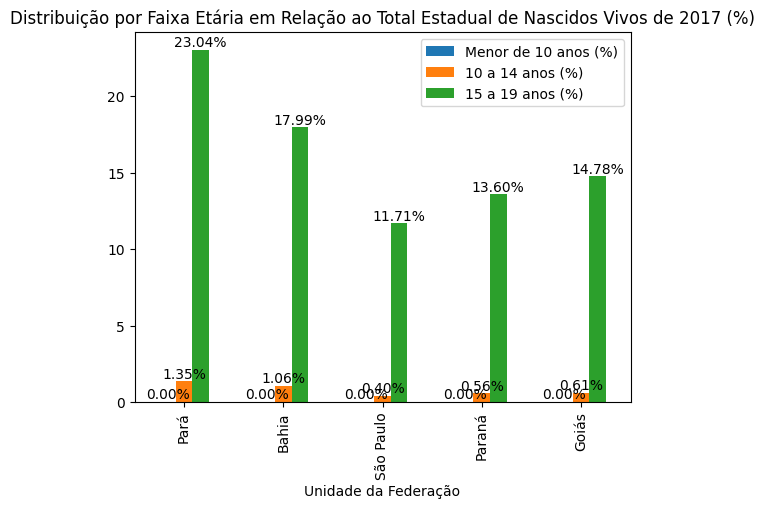

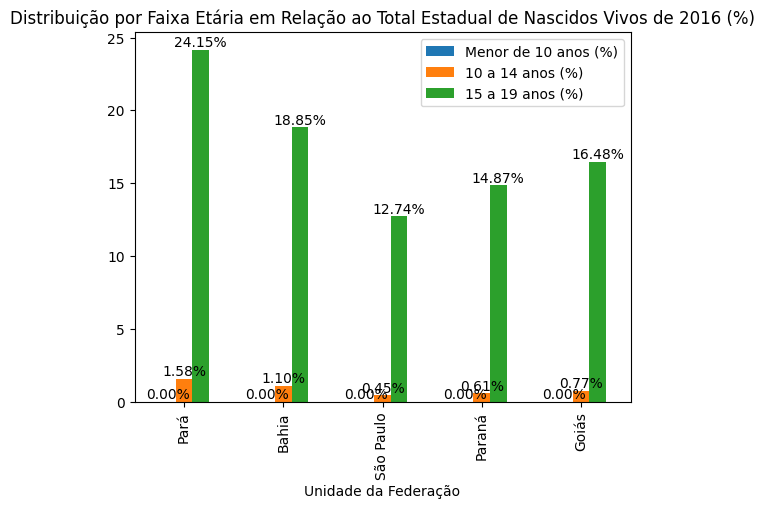

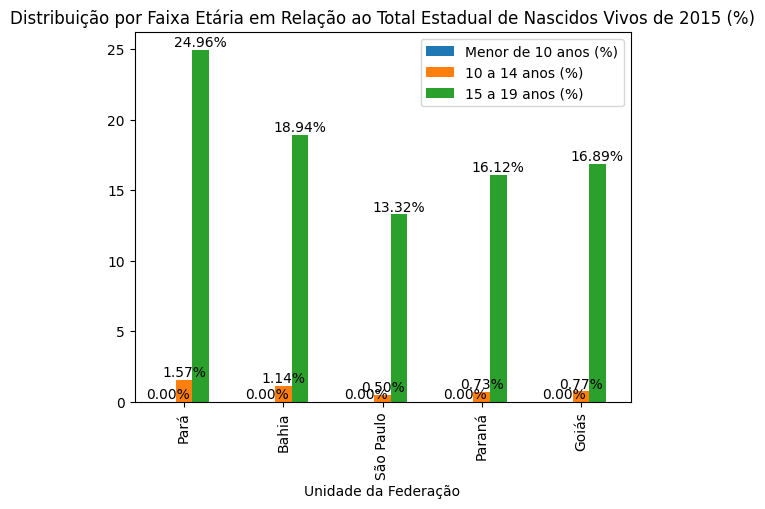

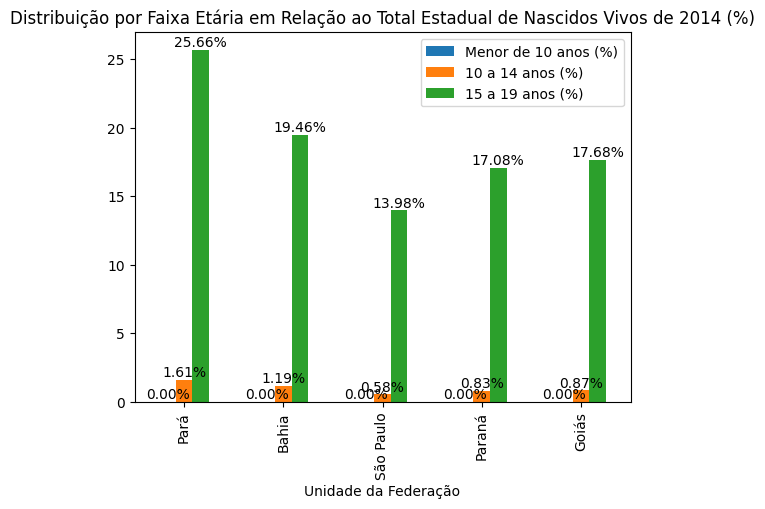

In [7]:
for i, df in enumerate(dfs):
    # Calcular porcentagens
    df['Menor de 10 anos (%)'] = (df['Menor de 10 anos'] / df['Total']) * 100
    df['10 a 14 anos (%)'] = (df['10 a 14 anos'] / df['Total']) * 100
    df['15 a 19 anos (%)'] = (df['15 a 19 anos'] / df['Total']) * 100

    df_percent = df[['Menor de 10 anos (%)', '10 a 14 anos (%)', '15 a 19 anos (%)']]

    ax = df_percent.plot(kind='bar', title=f'Distribuição por Faixa Etária em Relação ao Total Estadual de Nascidos Vivos de {anos[i]} (%)')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')
        
    axs.append(ax)